# Fist Reduced Quantum Genetic Algorithm

In [49]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from collections import Counter
import numpy as np

Lets init our circuit and put each qubit in superposition and in a random state :

[0.35738333 0.34652403 0.43562378 0.68439095 0.48240032 0.6305279 ]


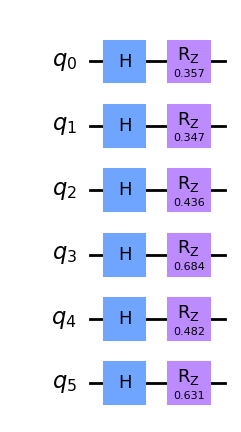

In [50]:
n = 6

circuit = QuantumCircuit(n)
circuit.h(range(n))
rand_theta = np.random.uniform(0, 2*np.pi/n, n)
print(rand_theta)
for i in range(n):
    circuit.rz(rand_theta[i], i)

circuit.draw(output = "mpl")

Now let's make a Grover Algorithm
First we need to create an Oracle that change state of the expected value

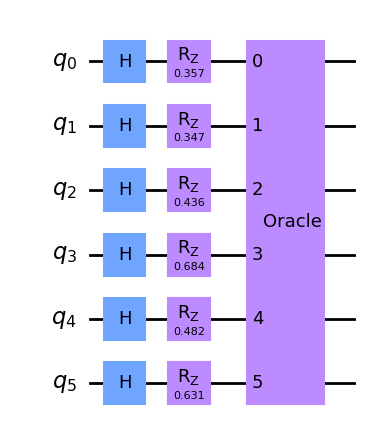

In [51]:
expected = 8

oracle = np.identity(2**n)
oracle[expected][expected] = -1

circuit.unitary(oracle, range(n), label='Oracle')
circuit.draw(output = "mpl")

Now we can add the Grover Inverse

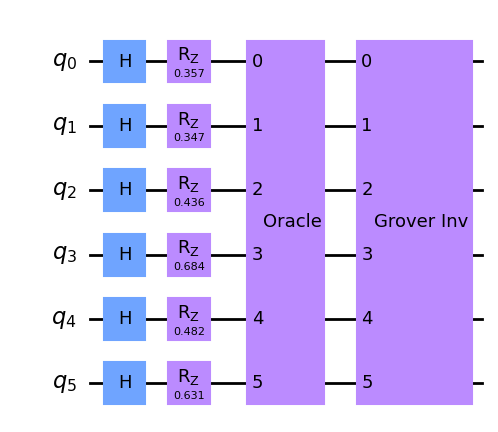

In [52]:
def ia(size):
    ia_mat=2*np.ones(size)/size
    ia_mat=ia_mat-np.identity(size)
    return ia_mat
GIM = ia(2**n)
circuit.unitary(GIM,range(n), label='Grover Inv')

circuit.draw(output = "mpl")

And finally we measure all qubits from our circuit multiple time to get some probabilities

In [53]:
circuit.measure_all()

Counter({'001000': 879, '000000': 541, '111111': 520, '000010': 386, '000100': 331, '111110': 326, '111101': 316, '111011': 311, '000001': 295, '010000': 290, '101111': 269, '100000': 251, '011111': 215, '000110': 201, '000011': 193, '110111': 190, '111010': 177, '111100': 176, '000101': 173, '101101': 165, '010010': 164, '111001': 159, '010100': 141, '101110': 139, '010001': 138, '100001': 130, '101011': 123, '100010': 113, '001010': 111, '011101': 109, '110000': 109, '110101': 108, '001001': 108, '100100': 107, '011110': 95, '011011': 93, '010110': 89, '110110': 87, '111000': 85, '001111': 85, '110011': 83, '000111': 83, '011000': 81, '100111': 81, '010011': 80, '001100': 79, '001110': 69, '110100': 65, '001011': 63, '100101': 60, '010101': 60, '110010': 58, '011100': 58, '010111': 57, '101000': 57, '101100': 56, '101001': 56, '011001': 56, '100011': 54, '100110': 54, '011010': 52, '101010': 51, '001101': 51, '110001': 38})


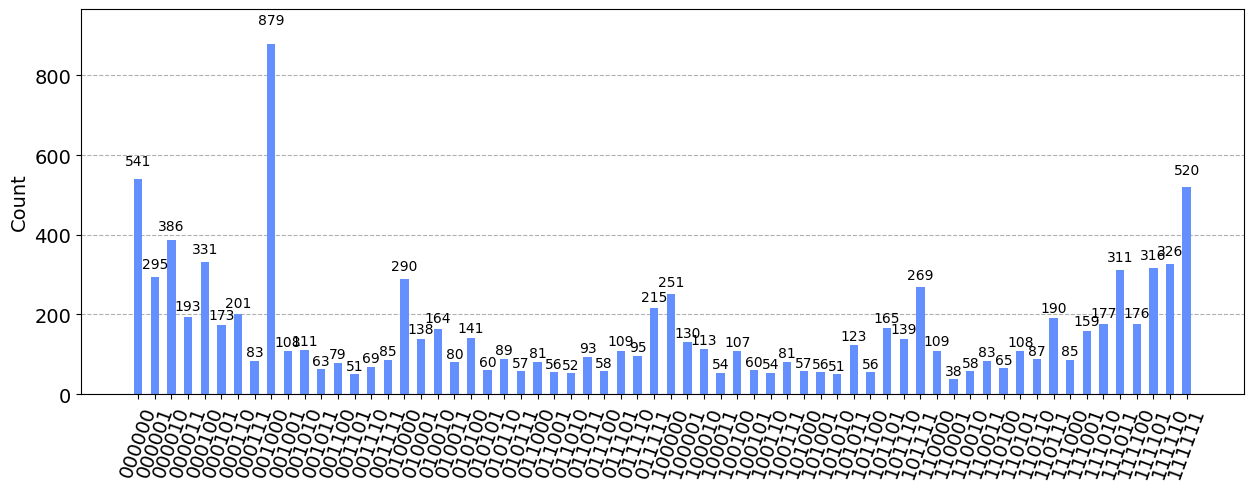

In [54]:
sim = Aer.get_backend('qasm_simulator')
result = Counter(execute(circuit,backend=sim,shots=10000).result().get_counts())
print(result)
plot_histogram(result, figsize=(15, 5))